In [37]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

#RANDOM_SEED is set to 42, which is used to ensure that the results of the code are reproducible.

In [38]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'


In [39]:
NUM_CLASSES = 4
#sets the number of classes in the classification task to 4

In [40]:
TIME_STEPS = 16
DIMENSION = 2

#TIME_STEPS specifies the number of time steps in the input sequence for the LSTM model
#DIMENSION specifies the dimensionality of each time step. In this case, each time step has a dimensionality of 2

In [41]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

#loads the input dataset and creates an array of input features

In [42]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

#loads the input dataset and creates an array of target labels
#The resulting y_dataset array contains the target labels that correspond to the input features in X_dataset.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

#splits the dataset into training and testing sets using the train_test_split() function from the sklearn.model_selection module
#train_size=0.75 specifies that 75% of the data will be used for training and 25% for testing.

In [44]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
#use_lstm is a boolean variable that specifies whether to use a Long Short-Term Memory (LSTM) layer in the model.
#If use_lstm is True, an LSTM layer is included in the model; 
#otherwise, a fully connected feedforward neural network is used.

#tf.keras.layers.Dropout() applies dropout regularization to prevent overfitting.
#tf.keras.layers.Dense() defines a fully connected feedforward neural network layer.

else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

#tf.keras.layers.Dense() layer has a softmax activation function to output class probabilities.


In [45]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 24)                792       
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                250       
                                                                 
 dense_11 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [46]:
# to create a callback that saves the model's weights after every epoch if the validation loss has improved.

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

#to create a callback that stops the training process if the validation loss does not improve after a specified number of epochs (i.e., the model has stopped learning). 

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [47]:
# This line of code compiles the Keras model with the specified settings, including the optimizer, loss function, and evaluation metrics.

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

#This line of code trains the Keras model on the training data and evaluates its performance on the validation data for a specified number of epochs.
#It also specifies the batch size used during training and the callbacks used to save the model weights and stop training early if necessary.

Epoch 1/1000
30/32 [===========================>..] - ETA: 0s - loss: 1.3682 - accuracy: 0.4518
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 1s 18ms/step - loss: 1.3680 - accuracy: 0.4537 - val_loss: 1.3574 - val_accuracy: 0.5385
Epoch 2/1000
18/32 [===============>..............] - ETA: 0s - loss: 1.3561 - accuracy: 0.4931
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 1.3509 - accuracy: 0.4894 - val_loss: 1.3374 - val_accuracy: 0.5582
Epoch 3/1000
31/32 [============================>.] - ETA: 0s - loss: 1.3281 - accuracy: 0.5098
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 9ms/step - loss: 1.3281 - accuracy: 0.5101 - val_loss: 1.3136 - val_accuracy: 0.5823
Epoch 4/1000
18/32 [===============>..............] - ETA: 0s - lo

In [49]:
# loads a previously trained Keras model from the specified file path
model = tf.keras.models.load_model(model_save_path)

In [50]:
# predicts the class probabilities for the first example in the test set using the trained Keras model and then prints the predicted probabilities and the predicted class label.
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 88ms/step
[0.94695497 0.01077358 0.01921461 0.02305686]
0


42/42 [==============================] - 0s 1ms/step


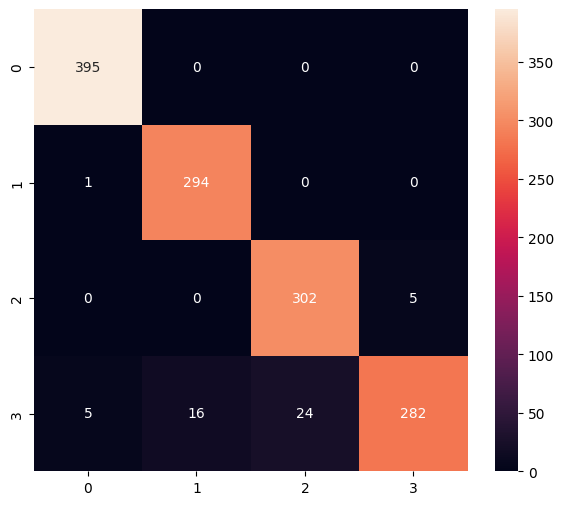

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.95      1.00      0.97       295
           2       0.93      0.98      0.95       307
           3       0.98      0.86      0.92       327

    accuracy                           0.96      1324
   macro avg       0.96      0.96      0.96      1324
weighted avg       0.96      0.96      0.96      1324



In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#defines a function print_confusion_matrix() which takes two input arrays y_true and y_pred, computes the confusion matrix and prints it along with the classification report.

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

#Finally, the print_confusion_matrix() function is called with y_test and y_pred to display the confusion matrix and classification report.

# Tensorflow-Lite

In [52]:
#
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [53]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [54]:
# saves the trained model to the specified file path without including the optimizer state. Then, the code loads the saved model from the same file path.

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\amaan\AppData\Local\Temp\tmp_nbda6oc\assets


6484

In [55]:
#creates a TensorFlow Lite interpreter by loading the model from the specified file path and allocates the required tensors for inference.

interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [56]:
# retrieves the input and output details of the TensorFlow Lite interpreter by calling the get_input_details() and get_output_details() methods, respectively 
#Then, the code prints the input details of the interpreter.

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_4:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [57]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

#sets the value of the input tensor of the TensorFlow Lite interpreter to the first sample of the test set
#we use the np.array() function to convert the input data to a NumPy array, which is the format required by the interpreter.

In [58]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

#The invoke() method is called to run the inference, and the output is obtained from the interpreter using the get_tensor()
#The output is stored in the tflite_results variable.
#The %%time magic command is used to measure the execution time of the code block

CPU times: total: 0 ns
Wall time: 0 ns


In [59]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.94695497 0.01077359 0.01921461 0.02305686]
0
